# Analysis of stock prices in different time periods


In [1]:
from analysis import Column,get_best_month_day

import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

FILENAME = "sp500.csv"
LIMIT = 5


def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    for i, func in enumerate(funcs):
        ax = axs[i]

        data = kwargs['data']
        x = kwargs['x']

        if func == lineplot:
            data[x] = data[x].astype(float)
        elif func == barplot:
            Y = data[kwargs['y']]
            ax.set_ylim(Y.quantile(0.20), Y.quantile(0.80))
            
        func(**kwargs, ax=ax)

    fig.tight_layout()

## Daily stock price fluctuations within a month

In [2]:
df = get_best_month_day(FILENAME, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed
2021-05-10 15:11:54.942 | DEBUG    | analysis:_get_month_day_diffs:174 - Not enough data for ABMD in 2010.12
2021-05-10 15:11:54.981 | DEBUG    | analysis:_get_month_day_diffs:174 - Not enough data for ABT in 2010.12
2021-05-10 15:11:54.981 | DEBUG    | analysis:_get_month_day_diffs:174 - Not enough data for MMM in 2010.12
2021-05-10 15:11:54.956 | DEBUG    | analysis:_get_month_day_diffs:174 - Not enough data for AOS in 2010.12


,year,month,day,diff
232,2011,12,1,100.0
233,2011,12,2,101.052627
234,2011,12,5,102.15538
235,2011,12,6,101.854631
236,2011,12,7,102.355886
...,...,...,...,...
1989,2018,11,26,100.305276
1990,2018,11,27,103.139988
1991,2018,11,28,100.959439
1992,2018,11,29,102.442213


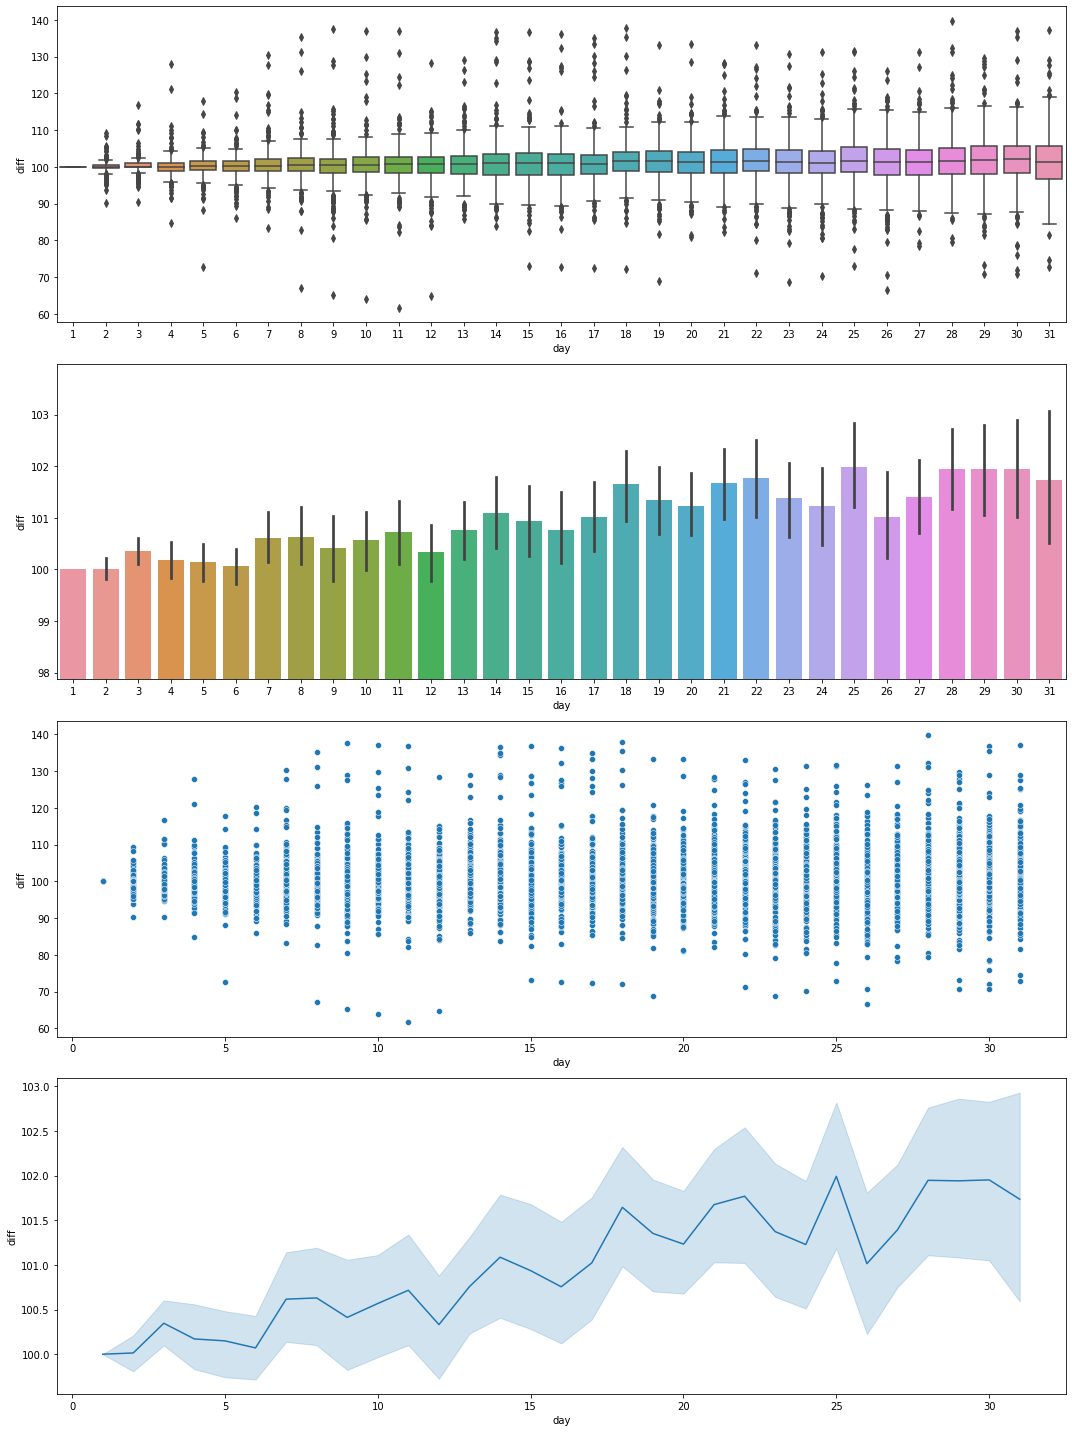

In [3]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Monthly stock price fluctuations within a year

In [4]:
from analysis import get_best_month

df = get_best_month(FILENAME, limit=LIMIT)
df

[*********************100%***********************]  5 of 5 completed
2021-05-10 15:12:02.140 | DEBUG    | analysis:_get_monthly_diffs:130 - Not enough data for AOS in 2010
2021-05-10 15:12:02.175 | DEBUG    | analysis:_get_monthly_diffs:130 - Not enough data for ABT in 2010
2021-05-10 15:12:02.189 | DEBUG    | analysis:_get_monthly_diffs:130 - Not enough data for MMM in 2010
2021-05-10 15:12:02.189 | DEBUG    | analysis:_get_monthly_diffs:130 - Not enough data for ABMD in 2010


,year,month,diff
1,2011,1,100.0
2,2011,2,127.491559
3,2011,3,139.773583
4,2011,4,160.628929
5,2011,5,177.078166
...,...,...,...
92,2018,8,108.576223
93,2018,9,114.358172
94,2018,10,116.472807
95,2018,11,117.806165


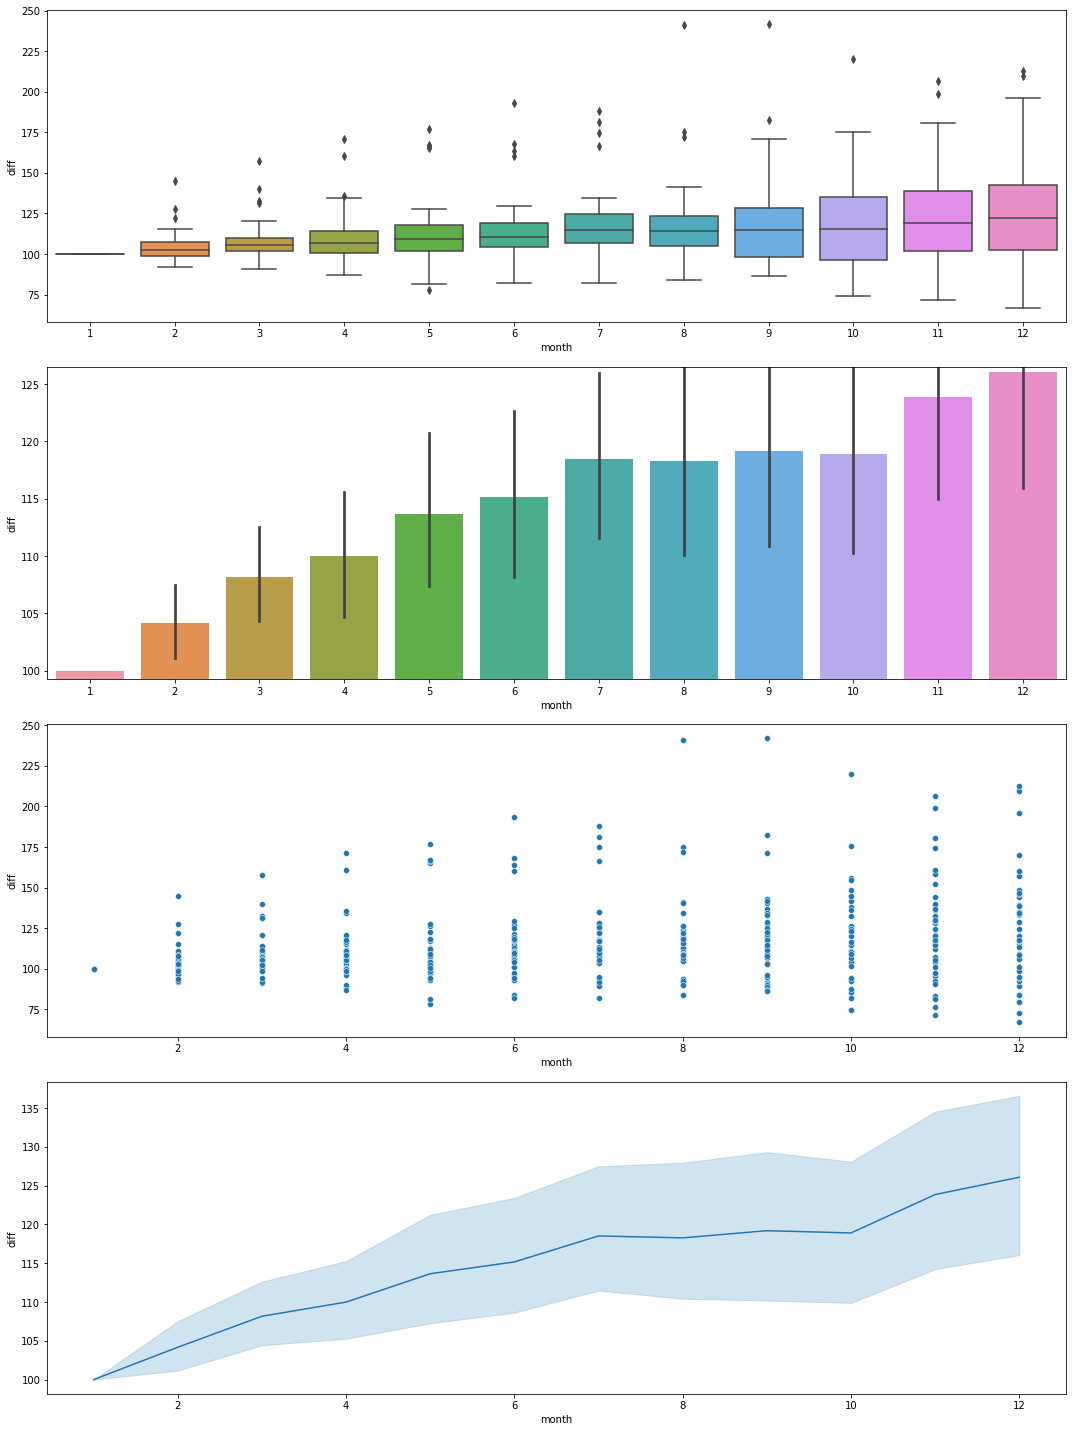

In [5]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [6]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


,year,week,weekday,diff
503,2013,1,2,66.224158
504,2013,1,3,66.375878
505,2013,1,4,65.655223
753,2013,1,0,100.0
754,2013,1,1,100.493082
...,...,...,...,...
2003,2018,51,0,100.0
2004,2018,51,1,103.289793
2005,2018,51,2,104.257374
2006,2018,51,3,102.539911


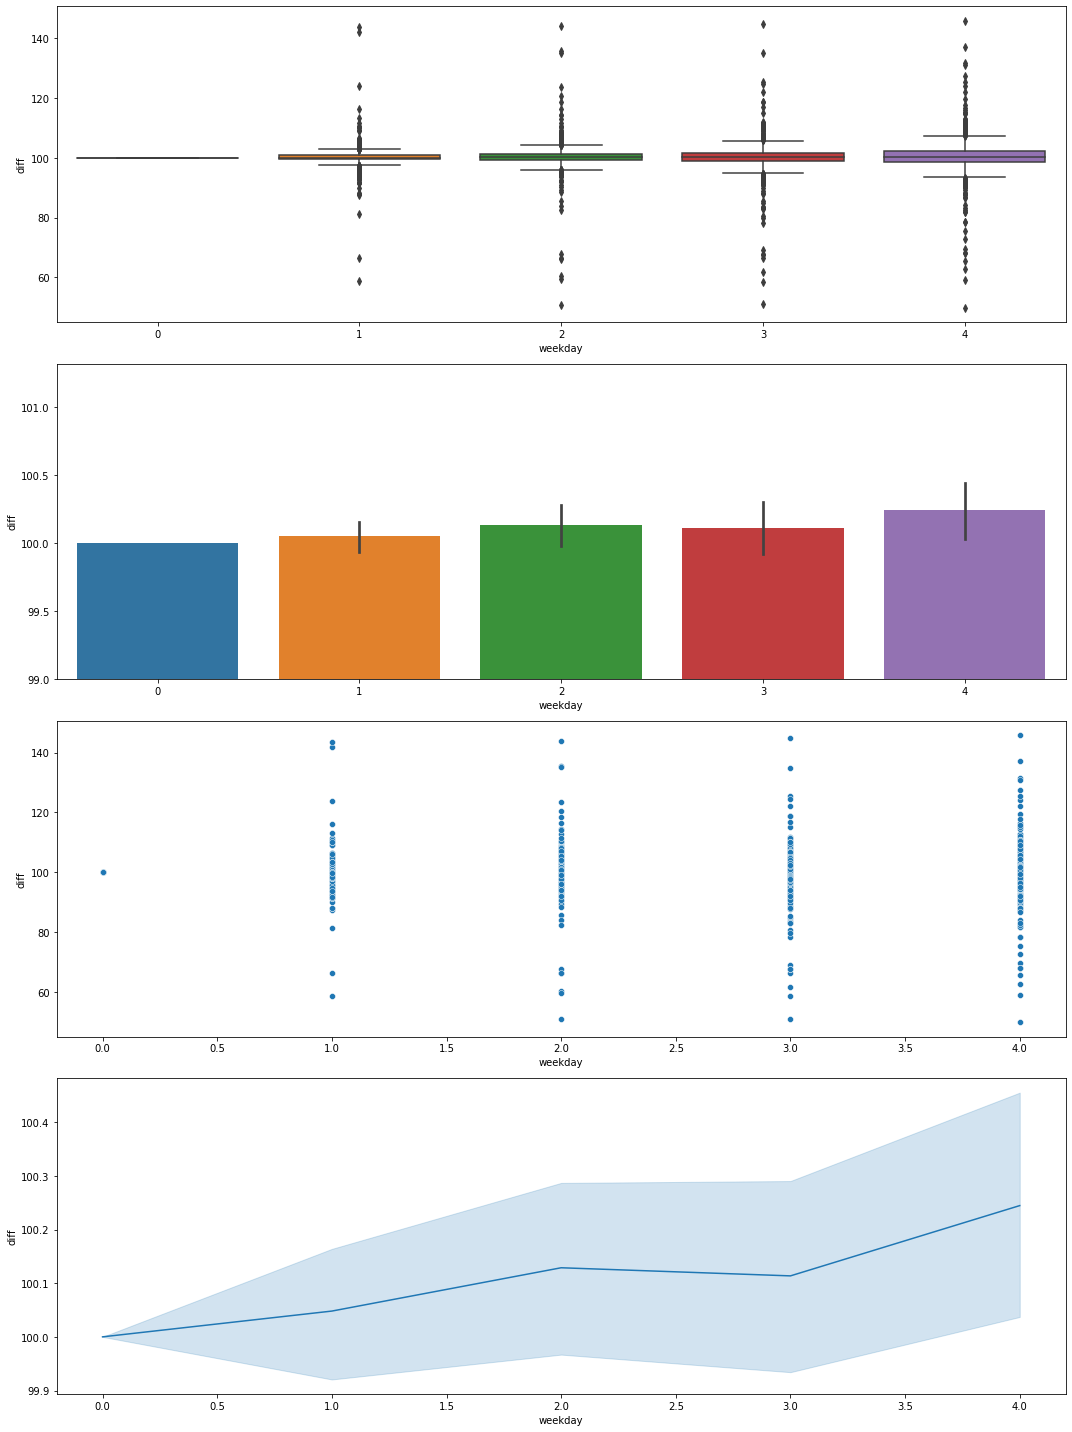

In [7]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)